In [844]:
import math
import time
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import mlx.core as mx

from main import *

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [845]:
# config

# ------------- data ----------------
n_train = 2 ** 4
n_test = 8
batch_size = 8

# ------------- model ---------------
input_dim = 2
hidden_dim = 1

# ------------ training -------------
n_epochs = 128
lr = 1e-2

In [846]:
true_params = np.random.normal(size=(input_dim,))

X_train, y_train, X_test, y_test = map(mx.array, load_tanh(true_params=true_params, 
                                                           n_train=n_train, 
                                                           n_test=n_test))

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (16, 2)
Training labels shape:  (16,)
Test data shape:  (8, 2)
Test labels shape:  (8,)


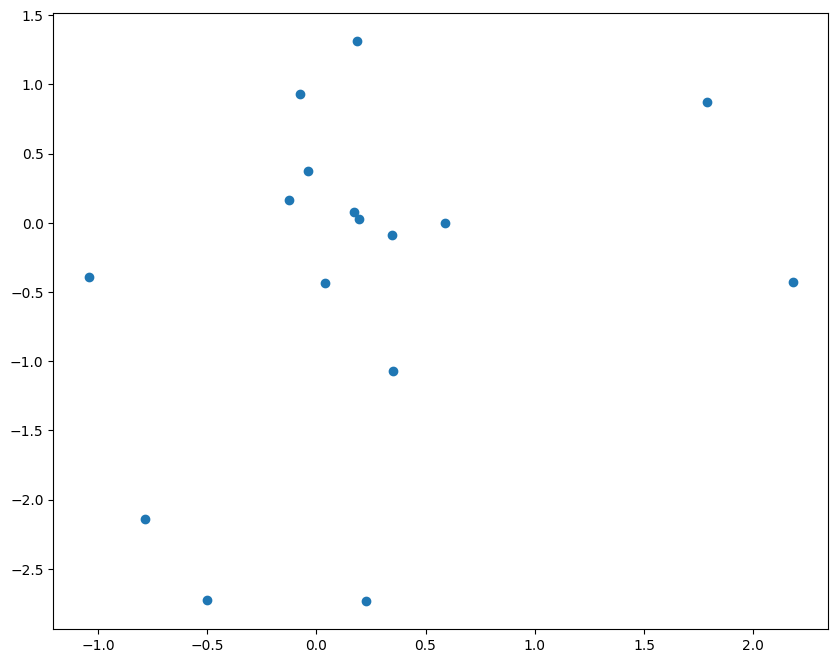

In [847]:
fig, ax = plt.subplots()

xs = X_train[:, 0]
ys = X_train[:, 1]

ax.scatter(xs, ys)

In [848]:
params = rcnew(input_dim, hidden_dim)
fwd = rcfwd 
# params = 1e-2 * mx.random.normal(shape=(input_dim, 1))
# fwd = lambda params, X: mx.tanh(X @ params)

model = (fwd, params)

sgd = sgdnew(lr=lr)

tic = time.perf_counter_ns()
trained_params, metrics = sgdsolve(sgd=sgd, 
                                   model=model, 
                                   X=X_train,
                                   y=y_train,
                                   batch_size=batch_size, 
                                   n_epochs=n_epochs, 
                                   print_every=100)
toc = time.perf_counter_ns()

dt = toc - tic
print(f"Untrained parameters: {params}")
print(f"Trained parameters: {trained_params}")
print(f"True parameters: {mx.array(true_params)}")
print(f"Error norm: {(mx.array(true_params) - trained_params['wx']).square().sum():.5f}")
print(f"Training time (ns): {dt}")
print(f"Throughput (ns/it): {dt / len(metrics)}")

step: 100 | epoch: 49 | loss: 0.01265 | dt: 224792ns
step: 200 | epoch: 99 | loss: 0.00250 | dt: 177959ns
Untrained parameters: {'wx': array([0.0063416, -0.00322706], dtype=float32), 'wh': array([[-0.00952666]], dtype=float32)}
Trained parameters: {'wx': array([-0.113923, -0.508014], dtype=float32), 'wh': array([[-0.00952666]], dtype=float32)}
True parameters: array([-0.117004, -0.590437], dtype=float32)
Error norm: 0.00680
Training time (ns): 69346500
Throughput (ns/it): 34673250.0


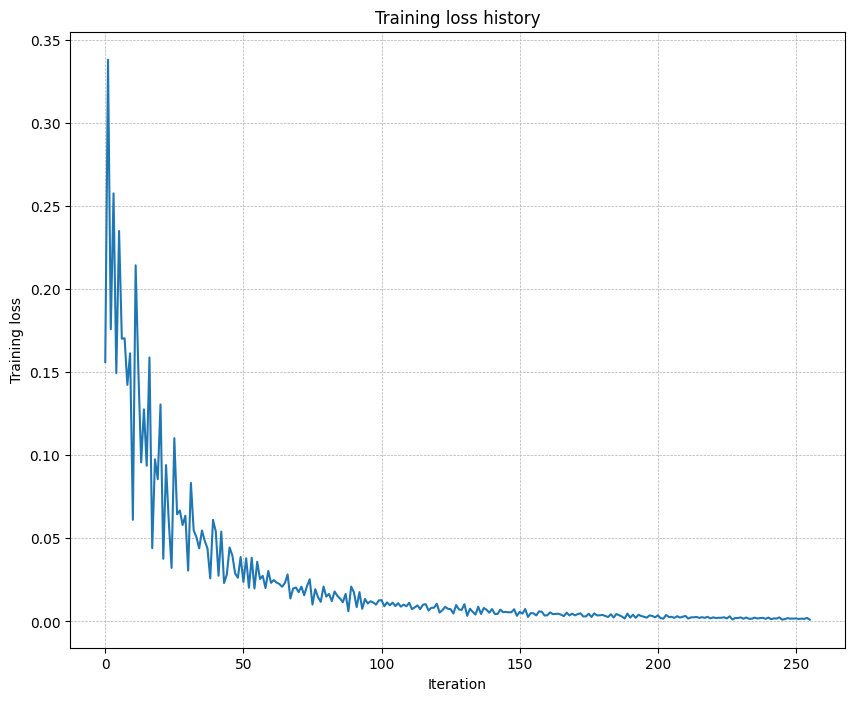

In [849]:
fig, ax = plt.subplots()

ax.plot([loss for loss in metrics['loss'][::]]) # plot every 4th loss
ax.set_title('Training loss history')
ax.set_xlabel('Iteration')
ax.set_ylabel('Training loss')
ax.grid(linestyle='--', linewidth=0.5)
plt.show()


# TODO: Plot accuracy

In [850]:
# TODO: Hyperparam tuning